In [155]:
import pandas as pd
df = pd.read_csv('heart_2020_cleaned.csv')
display(df)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


Convert none numeric values to numeric values in columns with binary values (Yes or No) and in the AgeCategory column

In [156]:
binary_columns = [
        'HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke',
        'DiffWalking', 'PhysicalActivity', 'Asthma',
        'KidneyDisease', 'SkinCancer'
    ]
# Map Yes/No to 1/0
for column in binary_columns:
    if column == 'KidneyDisease':
        df['KidneyDisease'] = df['KidneyDisease'].replace({'Yes': 1, 'No': 0}).astype(int)

    else:
        df[column] = df[column].map({'Yes': 1, 'No': 0})


def get_age_group_10_years(age_category):
   """
   Takes the original age category and returns a new 10-year category

   Parameters:
   age_category (str): Original age category (e.g. "18-24", "25-29" etc.)

   Returns:
   str: New age category ("18-29", "30-39" etc.)
   """
   if age_category in ['18-24', '25-29']:
       return '18-29'
   elif age_category in ['30-34', '35-39']:
       return '30-39'
   elif age_category in ['40-44', '45-49']:
       return '40-49'
   elif age_category in ['50-54', '55-59']:
       return '50-59'
   elif age_category in ['60-64', '65-69']:
       return '60-69'
   elif age_category in ['70-74', '75-79']:
       return '70-79'
   elif age_category == '80 or older':
       return '80+'
   else:
       return 'Unknown'

# Add new age group column
df['AgeCategory'] = df['AgeCategory'].apply(get_age_group_10_years)

display(df)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,Female,50-59,White,Yes,1,Very good,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,Female,80+,White,No,1,Very good,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,Male,60-69,White,Yes,1,Fair,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,Female,70-79,White,No,0,Good,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,Female,40-49,White,No,1,Very good,8.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,Male,60-69,Hispanic,Yes,0,Fair,6.0,1,0,0
319791,0,29.84,1,0,0,0.0,0.0,0,Male,30-39,Hispanic,No,1,Very good,5.0,1,0,0
319792,0,24.24,0,0,0,0.0,0.0,0,Female,40-49,Hispanic,No,1,Good,6.0,0,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,Female,18-29,Hispanic,No,0,Good,12.0,0,0,0


Remove outliers values

In [157]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# df_clean = df.copy()
# # Calculate IQR and bounds for each numerical column
# for column in ['BMI', 'PhysicalHealth', 'MentalHealth']:
#     Q1 = df_clean[column].quantile(0.25)
#     Q3 = df_clean[column].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
#
#     df_clean = df_clean[(df_clean[column] >= lower_bound) & (df_clean[column] <= upper_bound)]


# Handle SleepTime separately with fixed bounds (3-16 hours)
df = df[(df['SleepTime'] >= 1) & (df['SleepTime'] <= 16)]

Basic histogram of the prediction column
Distribution of heart disease, where 91.4% of the cases
(approximately 280,000 individuals) do not have heart disease, while only 8.6% (around 25,000 individuals) have heart disease.

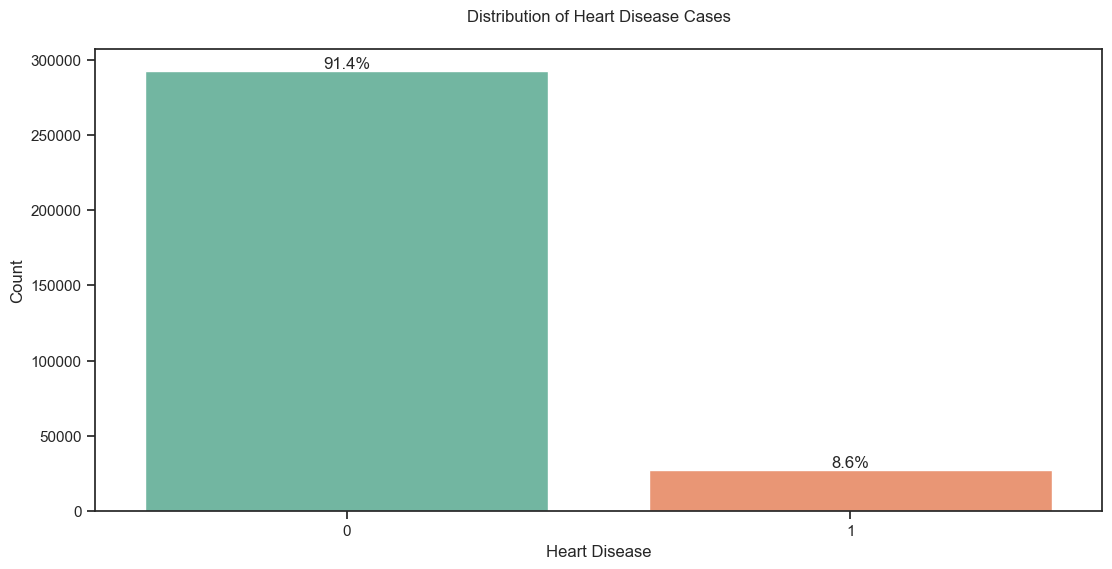

In [158]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the figure
plt.figure(figsize=(13, 6))

# Create histogram/count plot with updated syntax
sns.countplot(data=df, x='HeartDisease', hue='HeartDisease', palette='Set2', legend=False)

# Calculate percentages
total = len(df['HeartDisease'])
percentages = df['HeartDisease'].value_counts(normalize=True) * 100

# Add percentage labels on top of each bar
for i, percentage in enumerate(percentages):
    plt.text(i, df['HeartDisease'].value_counts()[i],
             f'{percentage:.1f}%',
             horizontalalignment='center',
             verticalalignment='bottom')

# Customize the plot
plt.title('Distribution of Heart Disease Cases', pad=20)
plt.xlabel('Heart Disease')
plt.ylabel('Count')

# Show plot
plt.show()

Distribution of heart disease cases across different racial groups, where each bar is split into two categories: those with heart disease (1) and those without (0). White individuals make up the largest portion of the dataset with approximately 220,000 cases, while other racial groups like Black, Asian, American Indian/Alaskan Native, Hispanic, and Other have significantly smaller representations.

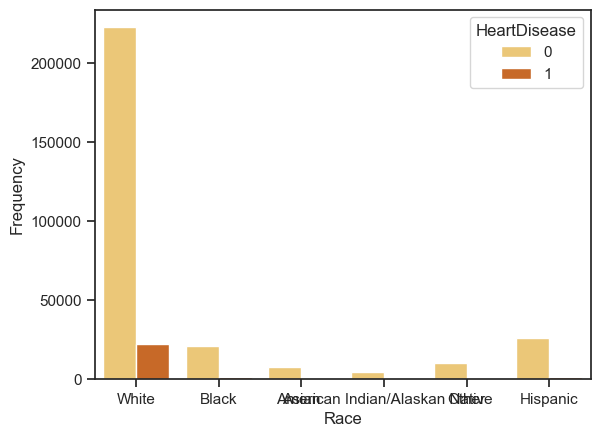

In [159]:
sns.countplot(data=df, x='Race', hue='HeartDisease', palette='YlOrBr')
plt.xlabel('Race')
plt.ylabel('Frequency')
plt.show()

Distribution of heart disease cases between males and females, with females having a slightly higher total frequency (approximately 155,000 cases) compared to males (approximately 135,000 cases). Both genders show a similar pattern where the majority of individuals don't have heart disease.

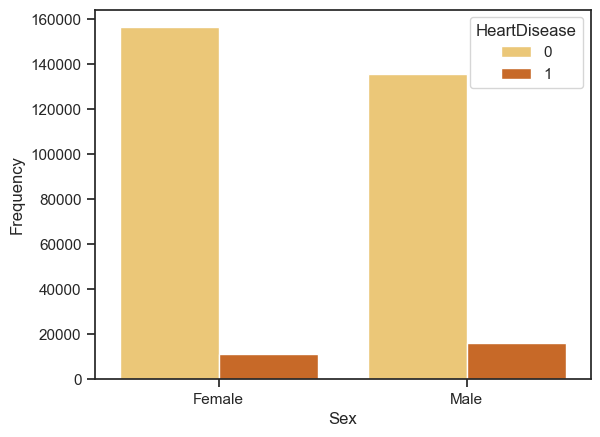

In [160]:
sns.countplot(data=df, x='Sex', hue='HeartDisease', palette='YlOrBr')
plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.show()

Distribution of heart disease cases across different age categories, showing that the 60-69 age group has the highest frequency with approximately 60,000 cases, followed by the 50-59 age group with about 50,000 cases. The incidence of heart disease (represented by 1 in lighter brown) appears to increase with age, with higher proportions in the older age groups (60-69, 70-79, and 80+)

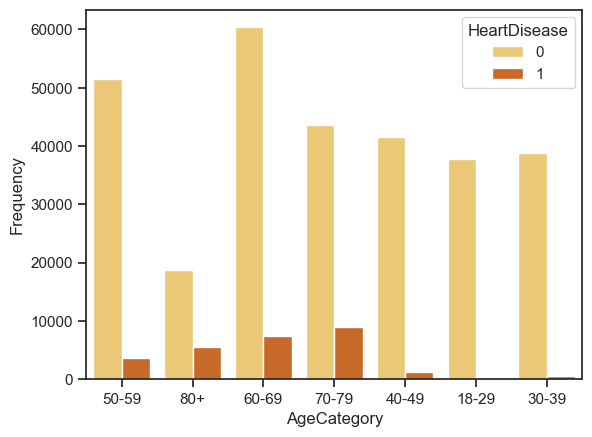

In [161]:
sns.countplot(data=df, x='AgeCategory', hue='HeartDisease', palette='YlOrBr')
plt.xlabel('AgeCategory')
plt.ylabel('Frequency')
plt.show()

Convert the non-numeric columns to numeric columns for the correlation matrix.


In [162]:
# ignore error
pd.set_option('future.no_silent_downcasting', True)
df_copy = df.copy()

# Sex mapping
df_copy['Sex'] = df_copy['Sex'].replace({'Male': 1, 'Female': 0})

# Age mapping
age_map = {
    '18-29': 1,
    '30-39': 2,
    '40-49': 3,
    '50-59': 4,
    '60-69': 5,
    '70-79': 6,
    '80+': 7
}
df_copy['AgeCategory'] = df_copy['AgeCategory'].replace(age_map)

# Race mapping
race_mapping = {
    'White': 0,
    'Black': 1,
    'Asian': 2,
    'American Indian/Alaskan Native': 3,
    'Hispanic': 4,
    'Other': 5
}
df_copy['Race'] = df_copy['Race'].replace(race_mapping)

# Diabetic mapping
diabetic_mapping = {
    'No': 0,
    'No, borderline diabetes': 1,
    'Yes (during pregnancy)': 2,
    'Yes': 3
}
df_copy['Diabetic'] = df_copy['Diabetic'].replace(diabetic_mapping)

# General Health mapping
genhealth_mapping = {
    'Poor': 0,
    'Fair': 1,
    'Good': 2,
    'Very good': 3,
    'Excellent': 4
}

df_copy['GenHealth'] = df_copy['GenHealth'].replace(genhealth_mapping)
df_copy['Sex'] = df_copy['Sex'].replace({'Male': 1, 'Female': 0}).astype(int)
display(df_copy)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,4,0,3,1,3,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,7,0,0,1,3,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,5,0,3,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,6,0,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,3,0,0,1,3,8.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,1,5,4,3,0,1,6.0,1,0,0
319791,0,29.84,1,0,0,0.0,0.0,0,1,2,4,0,1,3,5.0,1,0,0
319792,0,24.24,0,0,0,0.0,0.0,0,0,3,4,0,1,2,6.0,0,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,0,1,4,0,0,2,12.0,0,0,0


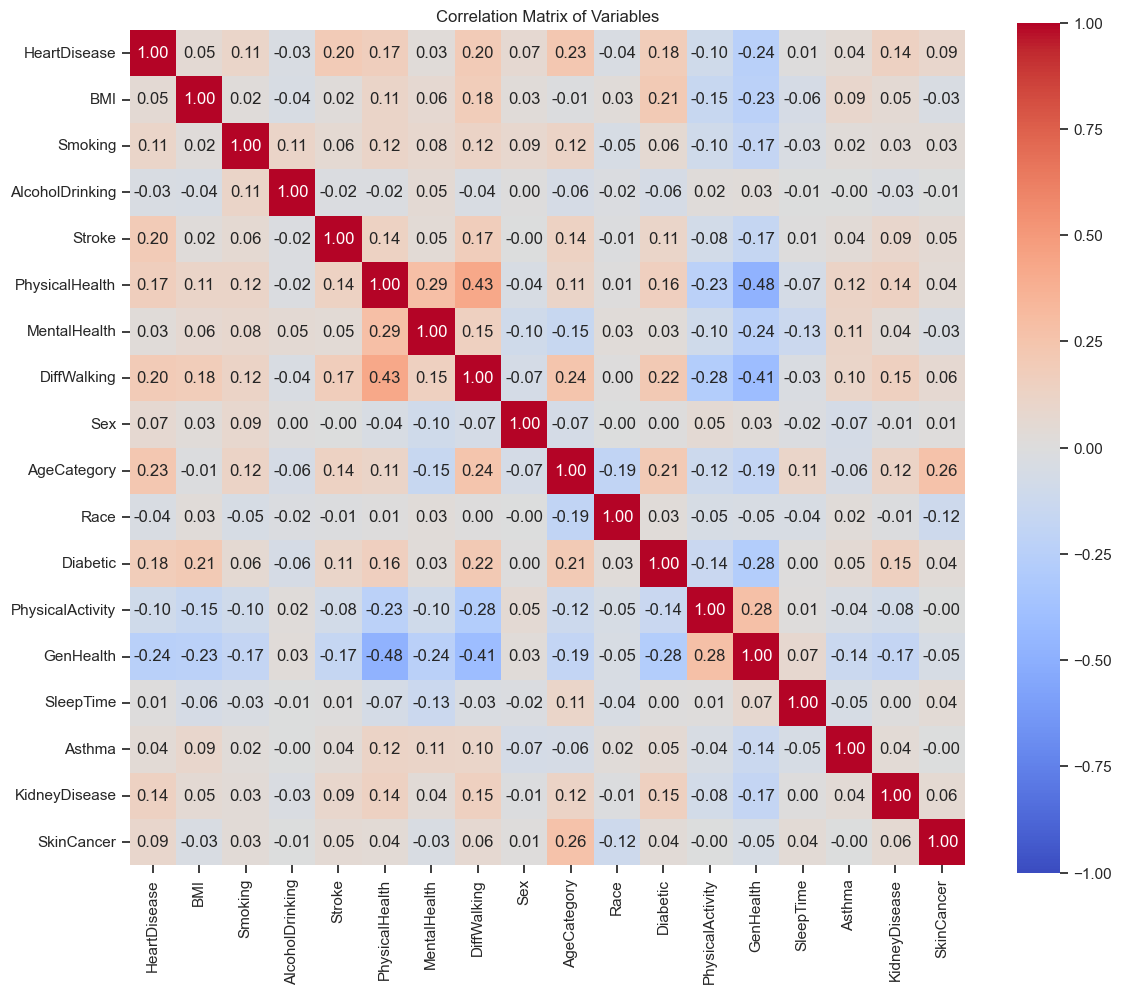

In [163]:
# Create correlation matrix
correlation_matrix = df_copy.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix,
            annot=True,          # show correlation values
            cmap='coolwarm',     # color scheme
            center=0,            # center the colormap at 0
            fmt='.2f',          # show 2 decimal places
            square=True,         # make the plot square-shaped
            vmin=-1, vmax=1)     # set the range of values

plt.title('Correlation Matrix of Variables')
plt.tight_layout()
plt.show()

This graph shows the percentage of heart disease across different lifestyle habits related to smoking and alcohol consumption. Smokers who don't drink have the highest prevalence of heart disease at 12.8%, while non-smokers who drink have the lowest at 3.0%. This aligns with the correlation matrix which showed smoking had a positive correlation with heart disease (0.11), meaning smoking is associated with increased heart disease risk. However, interestingly, alcohol drinking showed a very weak negative correlation (-0.03) with heart disease in the correlation matrix, which helps explain why the categories involving drinking (non-smoker drinker at 3.0% and smoker drinker at 6.6%) show lower heart disease percentages than their non-drinking counterparts (non-smoker non-drinker at 6.2% and smoker non-drinker at 12.8%).

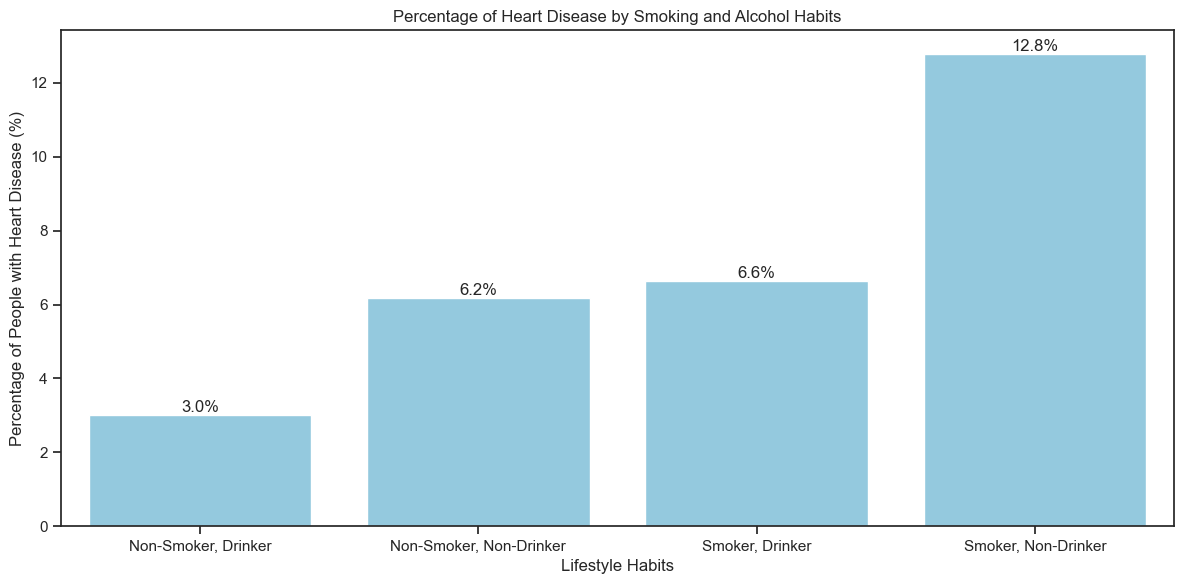

In [164]:
# read the data again to avoid changes that affect the next graph
df_smoke_drink = pd.read_csv('heart_2020_cleaned.csv')

# create a new column combining smoking and alcohol status
df_smoke_drink['Habits'] = (df_smoke_drink['Smoking'].map({'Yes': 'Smoker', 'No': 'Non-Smoker'}) + ', ' +
                df_smoke_drink['AlcoholDrinking'].map({'Yes': 'Drinker', 'No': 'Non-Drinker'}))

# calculate heart disease percentage for each combination
heart_disease_stats = df_smoke_drink.groupby('Habits')['HeartDisease'].apply(
    lambda x: (x == 'Yes').mean() * 100).reset_index()

# sort values for better visualization
heart_disease_stats = heart_disease_stats.sort_values('HeartDisease')

# create a bar plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Habits',
                 y='HeartDisease',
                 data=heart_disease_stats,
                 color='skyblue')

# add percentage labels on top of each bar
for i, v in enumerate(heart_disease_stats['HeartDisease']):
    ax.text(i, v, f'{v:.1f}%', ha='center', va='bottom')

plt.title('Percentage of Heart Disease by Smoking and Alcohol Habits')
plt.xlabel('Lifestyle Habits')

plt.ylabel('Percentage of People with Heart Disease (%)')

plt.tight_layout()
plt.show()

This bar chart illustrates the relationship between heart disease prevalence, physical activity levels, and general health status. The data shows a clear progression in heart disease risk, ranging from 2.1% among physically active people with excellent health to 35.5% among inactive people with poor health. There's a consistent pattern where inactive individuals have higher heart disease rates compared to active individuals within the same health status category (e.g., inactive, poor at 35.5% vs active, poor at 31.9%). Additionally, as general health status declines from excellent to poor, there's a steady increase in heart disease prevalence regardless of activity level. This pattern is particularly dramatic in the poor health category, where rates jump to over 30%. These findings align with the correlation matrix, which showed negative correlations between heart disease and both physical activity (-0.10) and general health (-0.24), indicating that better health status and physical activity are associated with lower heart disease risk.

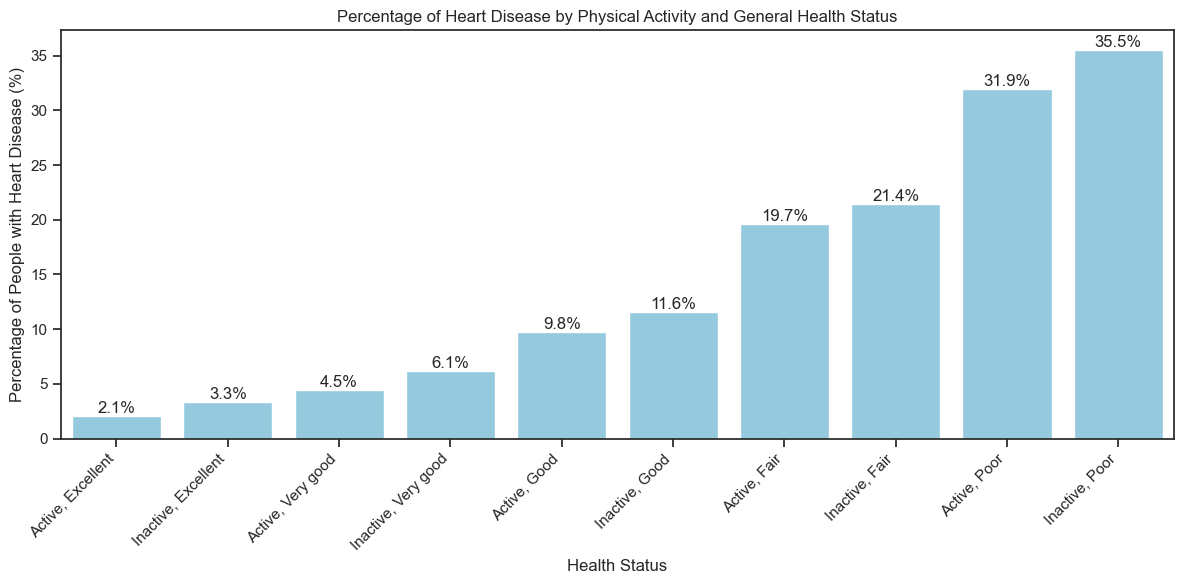

In [165]:
# read the data again to avoid changes that affect the next graph
df_physic_gen = pd.read_csv('heart_2020_cleaned.csv')

# create a new column combining physical activity and general health status
df_physic_gen['Health_Status'] = (df_physic_gen['PhysicalActivity'].map({'Yes': 'Active', 'No': 'Inactive'}) + ', ' +
                      df_physic_gen['GenHealth'])

# calculate heart disease percentage for each combination
heart_disease_stats = df_physic_gen.groupby('Health_Status')['HeartDisease'].apply(
    lambda x: (x == 'Yes').mean() * 100).reset_index()

# sort values for better visualization
heart_disease_stats = heart_disease_stats.sort_values('HeartDisease')

# create a bar plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Health_Status',
                 y='HeartDisease',
                 data=heart_disease_stats,
                 color='skyblue')

# add percentage labels on top of each bar
for i, v in enumerate(heart_disease_stats['HeartDisease']):
    ax.text(i, v, f'{v:.1f}%', ha='center', va='bottom')

plt.title('Percentage of Heart Disease by Physical Activity and General Health Status')
plt.xlabel('Health Status')
plt.ylabel('Percentage of People with Heart Disease (%)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

This bar chart illustrates the relationship between heart disease risk and the number of days with physical and mental health issues. The data shows a clear progressive increase in heart disease prevalence as the number of poor health days increases. At the lowest end, individuals with perfect physical health (0 days) and minimal mental health issues (1-5 days) show only 4.0% heart disease prevalence. In contrast, those experiencing the most health challenges (over 15 days of both physical and mental health issues) show the highest rate at 24.4%. The correlation appears stronger with physical health issues, as seen by larger jumps in heart disease rates when physical health days increase, which aligns with the correlation matrix showing physical health had a stronger correlation (0.17) with heart disease compared to mental health (0.03). This suggests that while both physical and mental health contribute to heart disease risk, physical health status has a more direct relationship with heart disease outcomes.

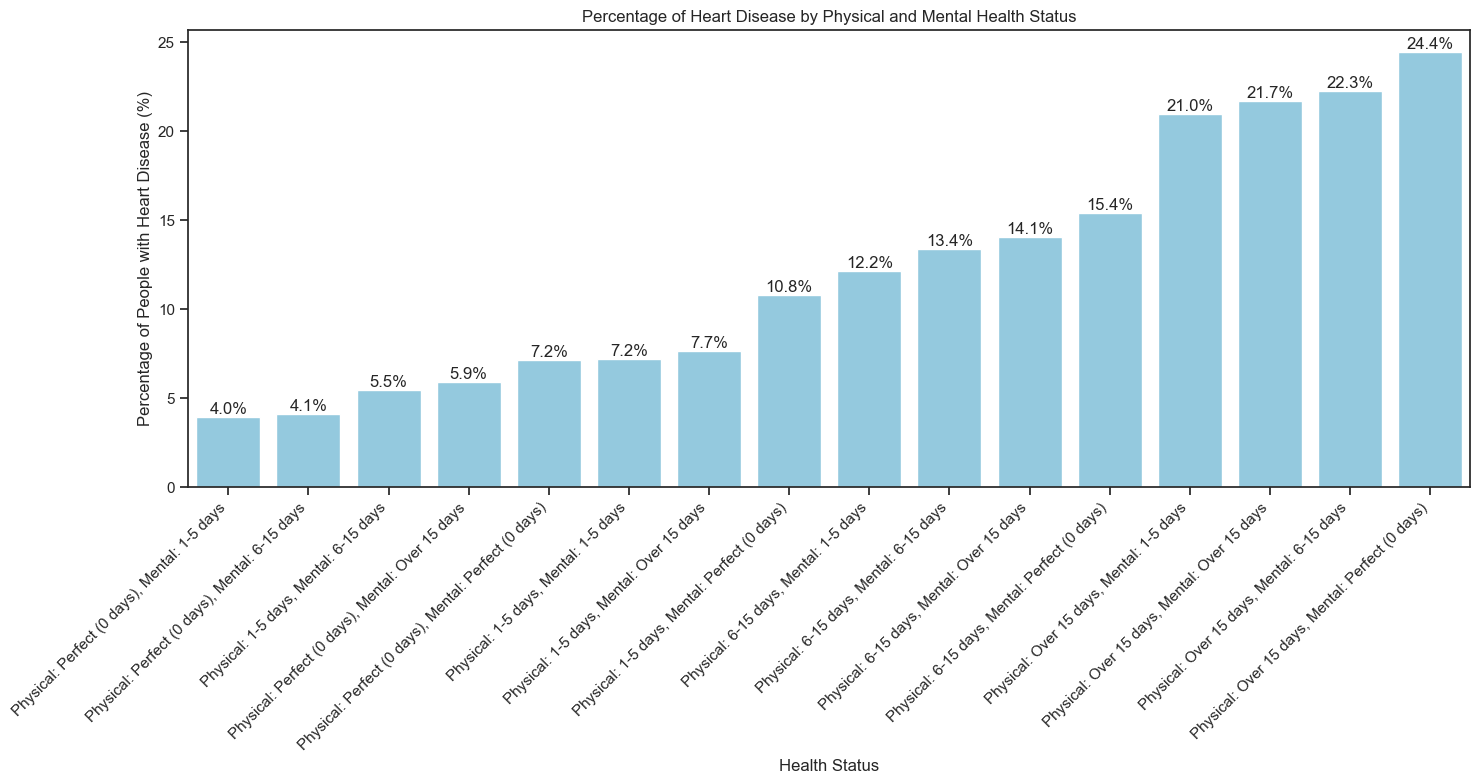

In [166]:
# read the data again to avoid changes that affect the next graph
df_physic_mental = pd.read_csv('heart_2020_cleaned.csv')

# create categories for Physical and Mental Health
def categorize_health(value):
   if value == 0:
       return 'Perfect (0 days)'
   elif value <= 5:
       return '1-5 days'
   elif value <= 15:
       return '6-15 days'
   else:
       return 'Over 15 days'

# create new columns with categorized health values
df_physic_mental['PhysicalHealth_Cat'] = df_physic_mental['PhysicalHealth'].apply(categorize_health)
df_physic_mental['MentalHealth_Cat'] = df_physic_mental['MentalHealth'].apply(categorize_health)

# create a new column combining both health categories
df_physic_mental['Health_Status'] = 'Physical: ' + df_physic_mental['PhysicalHealth_Cat'] + ', Mental: ' + df_physic_mental['MentalHealth_Cat']

# calculate heart disease percentage for each combination
heart_disease_stats = df_physic_mental.groupby('Health_Status')['HeartDisease'].apply(
   lambda x: (x == 'Yes').mean() * 100).reset_index()

# sort values for better visualization
heart_disease_stats = heart_disease_stats.sort_values('HeartDisease')

# create a bar plot
plt.figure(figsize=(15, 8))
ax = sns.barplot(x='Health_Status',
                y='HeartDisease',
                data=heart_disease_stats,
                color='skyblue')

# add percentage labels on top of each bar
for i, v in enumerate(heart_disease_stats['HeartDisease']):
   ax.text(i, v, f'{v:.1f}%', ha='center', va='bottom')

plt.title('Percentage of Heart Disease by Physical and Mental Health Status')
plt.xlabel('Health Status')
plt.ylabel('Percentage of People with Heart Disease (%)')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

This graph shows the percentage of heart disease cases across different combinations of diabetes and stroke conditions. Looking at the correlation matrix, both diabetes (0.18) and stroke (0.20) showed positive correlations with heart disease, which is strongly reflected in this visualization. The graph demonstrates a clear compounding effect of these conditions - individuals with neither condition have only 5.8% heart disease prevalence, while those with both diabetes and stroke have a dramatically higher rate at 48.1%. Those with only diabetes (19.3%) or only stroke (31.1%) fall in between, with stroke appearing to be a stronger individual risk factor, which aligns with its slightly higher correlation coefficient in the correlation matrix (0.20 vs 0.18 for diabetes).

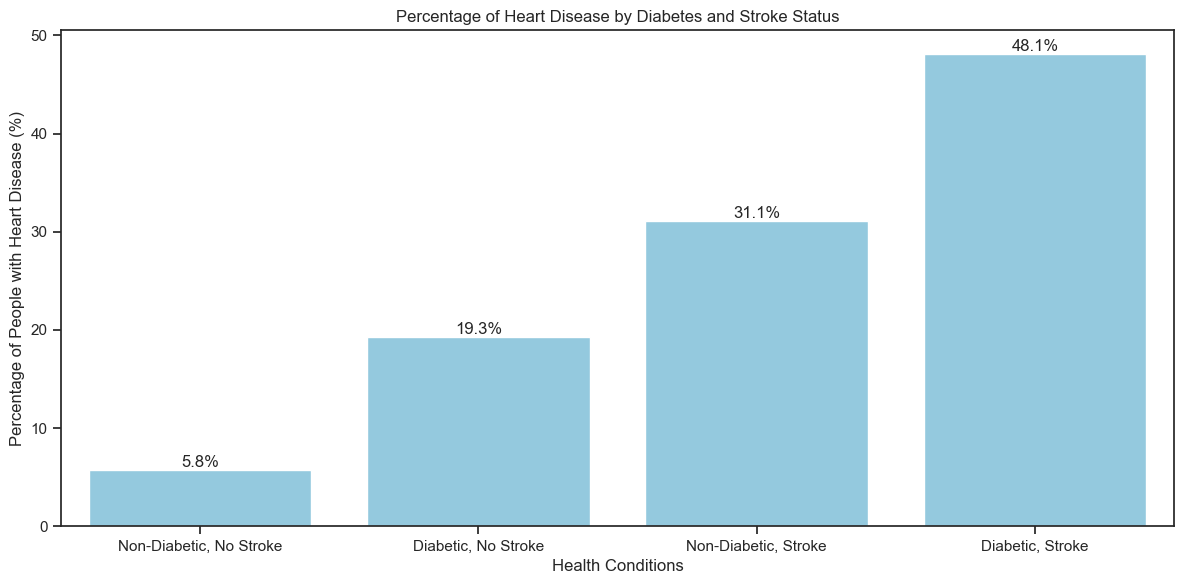

In [167]:
# read the data again to avoid changes that affect the next graph
df_diabetic_storke = pd.read_csv('heart_2020_cleaned.csv')

# create a combination of health conditions
df_diabetic_storke['Health_Conditions'] = (df_diabetic_storke['Diabetic'].map({'Yes': 'Diabetic', 'No': 'Non-Diabetic'}) + ', ' +
                         df_diabetic_storke['Stroke'].map({'Yes': 'Stroke', 'No': 'No Stroke'}))

# calculate heart disease percentage for each combination
heart_disease_stats = df_diabetic_storke.groupby('Health_Conditions')['HeartDisease'].apply(
   lambda x: (x == 'Yes').mean() * 100).reset_index()

# sort values for better visualization
heart_disease_stats = heart_disease_stats.sort_values('HeartDisease')

# create a bar plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Health_Conditions',
                y='HeartDisease',
                data=heart_disease_stats,
                color='skyblue')

# add percentage labels on top of each bar
for i, v in enumerate(heart_disease_stats['HeartDisease']):
   ax.text(i, v, f'{v:.1f}%', ha='center', va='bottom')

plt.title('Percentage of Heart Disease by Diabetes and Stroke Status')
plt.xlabel('Health Conditions')
plt.ylabel('Percentage of People with Heart Disease (%)')

plt.tight_layout()
plt.show()

This density plot shows the distribution of BMI (Body Mass Index) for people with and without heart disease. The distribution patterns are quite similar between both groups, with peaks occurring around BMI 25-30, which aligns with the very weak positive correlation (0.05) shown in the correlation matrix between BMI and heart disease. The plot shows only a slight rightward shift in the distribution for those with heart disease (orange line) compared to those without (blue line), suggesting that while higher BMI values are somewhat more common among heart disease patients, BMI alone isn't a strong predictor of heart disease, which is consistent with its low correlation coefficient.

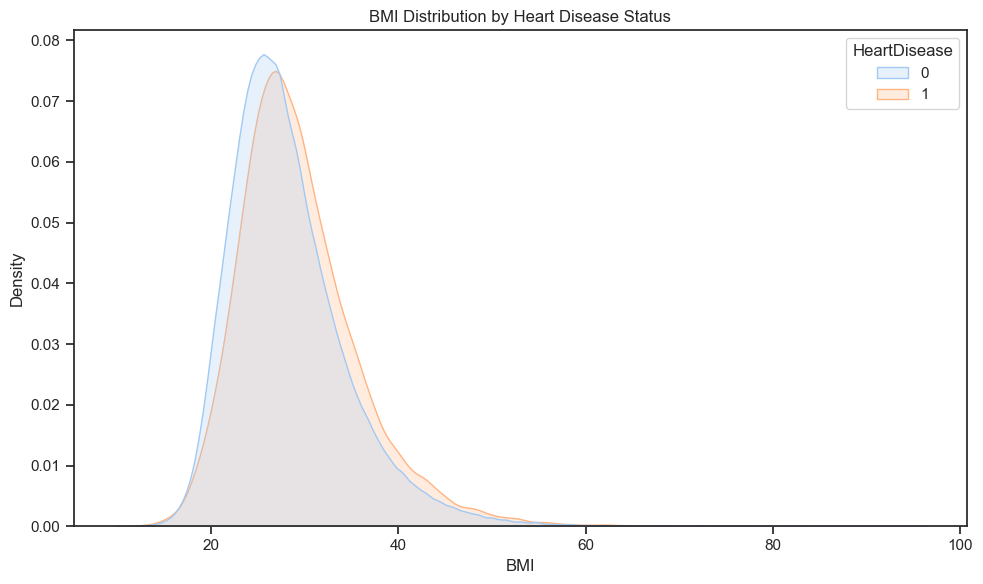

In [168]:
# create the density plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='BMI', hue='HeartDisease', fill=True, common_norm=False)

plt.title('BMI Distribution by Heart Disease Status')
plt.xlabel('BMI')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

This density plot illustrates the distribution of kidney disease among individuals with and without heart disease. The graph shows two main spikes: a dominant peak near 0 (representing no kidney disease) and a much smaller peak at 1 (indicating presence of kidney disease). Individuals without heart disease (shown in blue) have a higher spike at 0, indicating most people without heart disease also don't have kidney disease. The brown line representing people with heart disease shows a lower peak at 0 but a relatively higher density at 1, suggesting that while kidney disease is generally uncommon in both groups, it appears more frequently in people who have heart disease.

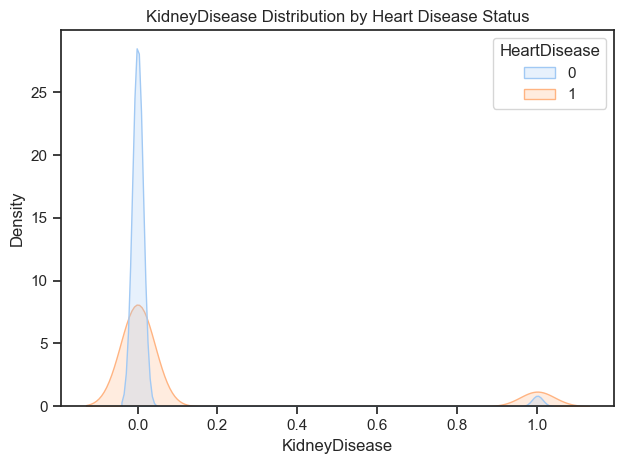

In [170]:
sns.kdeplot(data=df, x='KidneyDisease', hue='HeartDisease', fill=True, common_norm=False)

plt.title('KidneyDisease Distribution by Heart Disease Status')
plt.xlabel('KidneyDisease')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

This density plot shows the distribution of sleep hours comparing individuals with and without heart disease, with a red dashed line indicating the recommended 8 hours of sleep. The distribution is multimodal (showing multiple peaks) with the highest concentration around 7-8 hours of sleep for both groups. People without heart disease (shown in blue) have slightly higher peaks at the recommended sleep duration, while those with heart disease (shown in grey) show a more spread out distribution with lower peaks. However, the overall similar patterns between both groups align with the very weak correlation (0.01) found in the correlation matrix between sleep time and heart disease. The plot suggests that sleep duration alone may not be a strong predictor of heart disease risk, though there's a slight tendency for people without heart disease to maintain more regular sleep patterns closer to the recommended 8 hours.

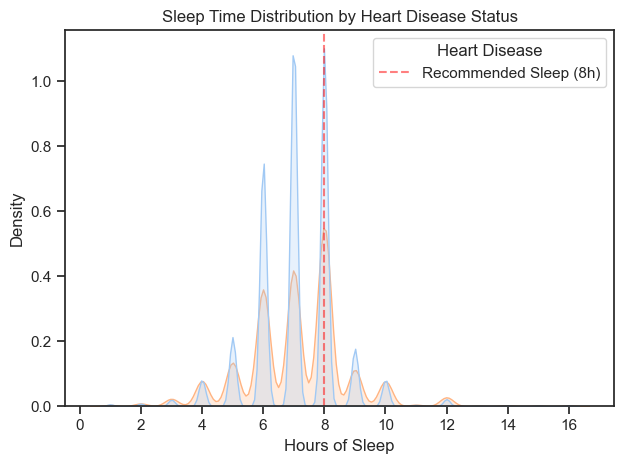

In [172]:
sns.kdeplot(data=df, x='SleepTime', hue='HeartDisease', fill=True, common_norm=False)

plt.title('Sleep Time Distribution by Heart Disease Status')
plt.xlabel('Hours of Sleep')
plt.ylabel('Density')

# Add vertical line for recommended sleep (8 hours)
plt.axvline(x=8, color='red', linestyle='--', alpha=0.5, label='Recommended Sleep (8h)')
plt.legend(title='Heart Disease')

plt.tight_layout()
plt.show()

This kernel density plot visualizes the relationship between BMI (Body Mass Index) and sleep time in hours. The plot shows several concentrated areas (shown in green and blue) indicating common combinations of BMI and sleep duration. The main clusters appear around BMI values of 20-40, with sleep durations between 5-10 hours. There are multiple horizontal bands in the density plot, suggesting that people across different BMI ranges tend to have similar sleep patterns, with most concentrated around 7-8 hours of sleep. The plot also shows minimal density in the extreme ranges (very low or very high BMI, or very short or long sleep durations), indicating these combinations are less common in the dataset.

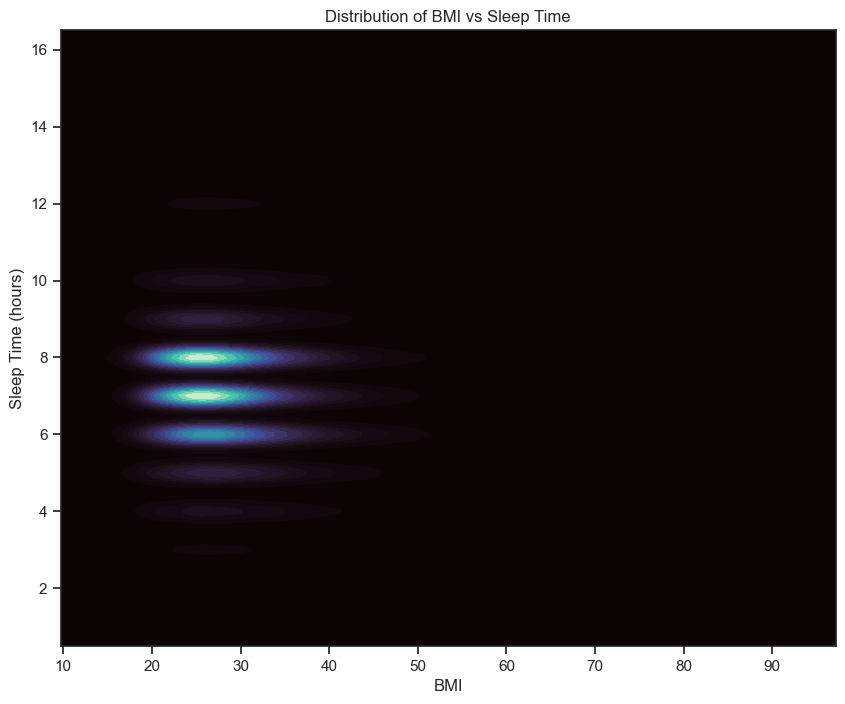

In [173]:
plt.figure(figsize=(10, 8))
sns.kdeplot(
    data=df, x="BMI", y="SleepTime",
    fill=True, thresh=0, levels=20, cmap="mako"
)
plt.title('Distribution of BMI vs Sleep Time')
plt.xlabel('BMI')
plt.ylabel('Sleep Time (hours)')
plt.show()

These two density plots compare the relationship between BMI and sleep time for people with heart disease (left) and without heart disease (right). In both groups, there are similar patterns of horizontal bands showing common sleep durations between 5-10 hours. However, there are some notable differences: people with heart disease (left plot) show a slightly higher concentration in the higher BMI ranges (30-40), indicated by the brighter red areas, while those without heart disease (right plot) have their highest concentrations in the lower BMI ranges (20-30). Both plots show multiple bands of sleep duration, suggesting that sleep patterns are similar regardless of BMI or heart disease status, which aligns with the weak correlations we saw earlier in the correlation matrix (BMI with heart disease: 0.05, sleep time with heart disease: 0.01).

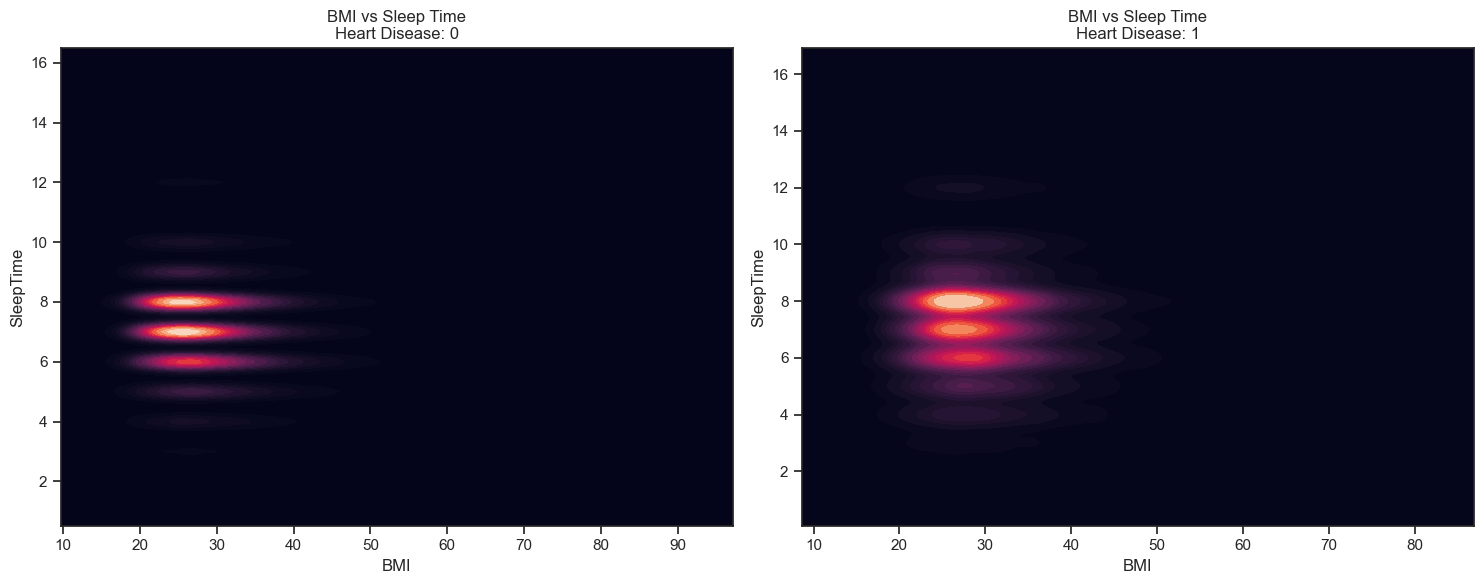

In [176]:
# separate plots by Heart Disease status for BMI vs Sleep Time
plt.figure(figsize=(15, 6))
for i, condition in enumerate(df['HeartDisease'].unique()):
    plt.subplot(1, 2, i+1)
    subset = df[df['HeartDisease'] == condition]
    sns.kdeplot(
        data=subset, x="BMI", y="SleepTime",
        fill=True, thresh=0, levels=20, cmap="rocket"
    )
    plt.title(f'BMI vs Sleep Time\nHeart Disease: {condition}')

plt.tight_layout()
plt.show()

These density plots compare BMI and Physical Health days between individuals with and without heart disease. The left plot (Heart Disease: 0) shows a concentrated cluster at lower BMI (20-30) and fewer physical health issue days, indicating healthier patterns. The right plot (Heart Disease: 1) reveals two distinct concentrations: one with low physical health days and normal BMI, and another showing higher physical health days, suggesting more health challenges in people with heart disease. These patterns align with the correlation matrix, which showed physical health had a moderate correlation with heart disease (0.17), while BMI showed a weaker correlation (0.05), highlighting that physical health issues may be a better indicator of heart disease risk than BMI alone.

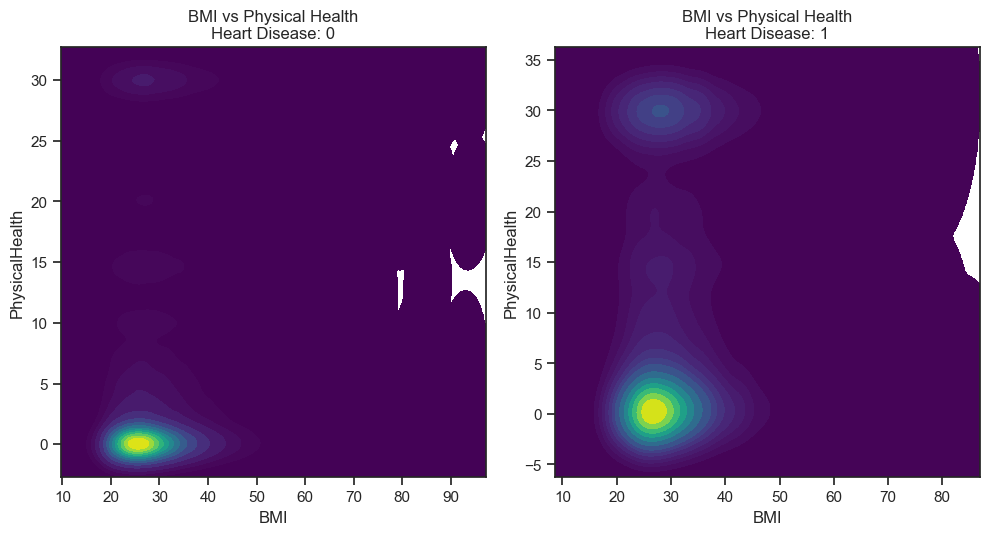

In [182]:
# create separate plots for each Heart Disease category
plt.figure(figsize=(15, 10))
for i, health in enumerate(df['HeartDisease'].unique()):
    plt.subplot(2, 3, i+1)
    subset = df[df['HeartDisease'] == health]
    sns.kdeplot(
        data=subset, x="BMI", y="PhysicalHealth",
        fill=True, thresh=0, levels=15, cmap="viridis"
    )
    plt.title(f'BMI vs Physical Health\nHeart Disease: {health}')

plt.tight_layout()
plt.show()

These density plots compare the relationship between Physical and Mental Health days for people with heart disease (left) and without heart disease (right). The plot for those without heart disease (right) shows a very concentrated hotspot near zero for both physical and mental health issues, indicating most healthy individuals experience few poor health days. In contrast, those with heart disease (left) show a more dispersed pattern with multiple concentrations, including a strong cluster near zero but also notable densities at higher numbers of physical and mental health days. This aligns with the correlation matrix findings where physical health showed a stronger correlation with heart disease (0.17) than mental health (0.03), though the visualization suggests these factors often occur together in heart disease patients.

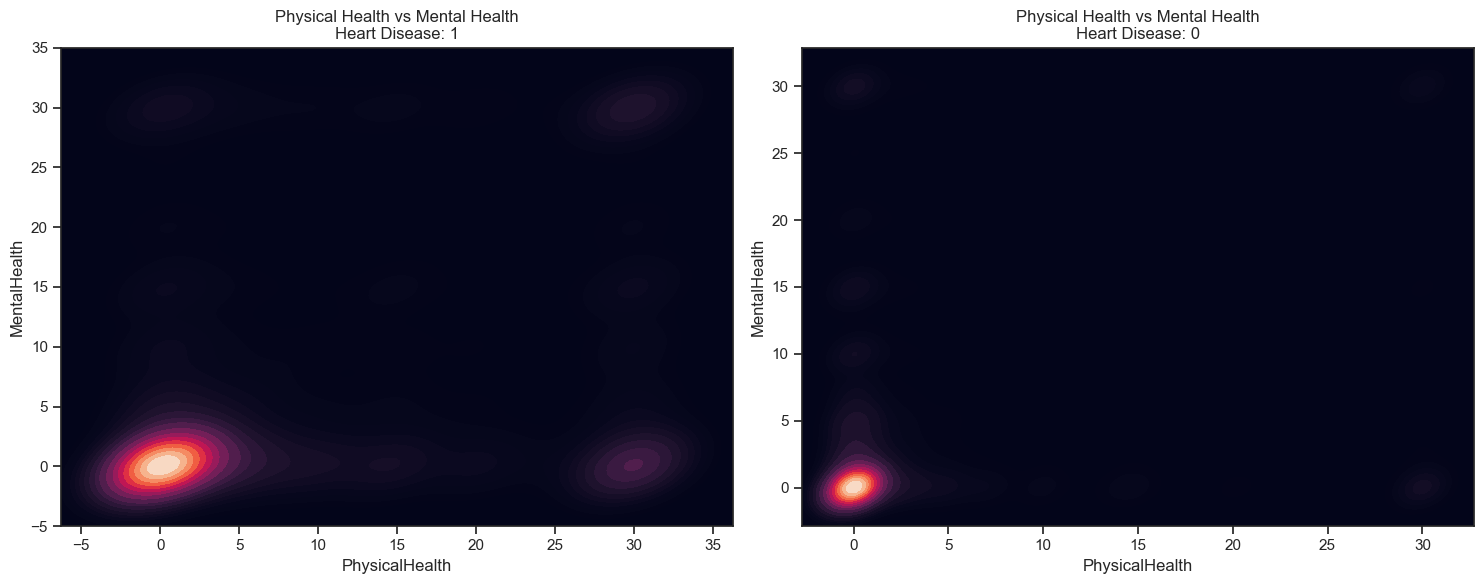

In [181]:
# Physical and Mental Health Impact
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.kdeplot(
    data=df[df['HeartDisease']==1],
    x="PhysicalHealth", y="MentalHealth",
    fill=True, thresh=0, levels=20, cmap="rocket",
)
plt.title(f'Physical Health vs Mental Health\nHeart Disease: 1')

plt.subplot(1, 2, 2)
sns.kdeplot(
    data=df[df['HeartDisease']==0],
    x="PhysicalHealth", y="MentalHealth",
    fill=True, thresh=0, levels=20, cmap="rocket",
)
plt.title(f'Physical Health vs Mental Health\nHeart Disease: 0')
plt.tight_layout()
plt.show()

# Maybe need to change or remove, to much data, cant really see the red dots
The visualization reveals that people without heart disease tend to cluster toward the lower values on both health axes, meaning they experienced fewer days of poor physical and mental health in the past month. In contrast, the red points (people with heart disease) appear more frequently in areas with higher numbers of poor health days, suggesting they experienced more days of both poor physical and mental health.
This aligns with the correlation matrix in a more meaningful way now - the positive correlation between heart disease and physical health (0.17) indicates that people with heart disease tend to have more days of poor physical health. The weaker correlation with mental health (0.03) suggests that while mental health issues may be more common in heart disease patients, the relationship isn't as strong as with physical health issues.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the dataset
df = pd.read_csv('heart_2020_cleaned.csv')

# Create the 3D scatter plot
fig = plt.figure(figsize=(18, 9))
ax = plt.axes(projection='3d')

# Create scatter plots with brighter colors
# Plot 'No' first (will be in the background)
colors = {
    'No': '#00FFFF',    # Cyan (bright blue) for No
    'Yes': '#FF4433'    # Bright red-orange for Yes
}

# Explicitly control the order by plotting 'No' first, then 'Yes'
for disease_status in ['No', 'Yes']:
    mask = df['HeartDisease'] == disease_status
    scatter = ax.scatter3D(
        df[mask]['PhysicalHealth'],
        df[mask]['MentalHealth'],
        df[mask]['SleepTime'],
        c=colors[disease_status],
        label=f'Heart Disease: {disease_status}',
        alpha=0.6,
        s=5
    )

# Customize the plot
ax.set_xlabel('Physical Health (days)', fontweight='bold')
ax.set_ylabel('Mental Health (days)', fontweight='bold')
ax.set_zlabel('Sleep Time (hours)', fontweight='bold')

# Add title and legend
plt.title('Relationship between Physical Health, Mental Health, Sleep Time, and Heart Disease',
          fontsize=14, pad=20)
plt.legend()

# Adjust the viewing angle
ax.view_init(elev=20, azim=45)

# Add a grid
ax.grid(True, alpha=0.3)

plt.show()

The boxplot reveals the intricate relationships between BMI, general health status, and heart disease presence. Across all general health categories (Excellent, Very good, Good, Fair, Poor), there's a consistent pattern where individuals with better general health ratings tend to have lower BMI values. The medians and distributions of BMI gradually increase as general health ratings decline, with Fair and Poor health categories showing the highest median BMIs and widest ranges. When comparing those with and without heart disease, people with heart disease consistently show slightly higher BMI medians within each health category, though this difference is most pronounced in the Fair and Poor health categories. All health categories display outliers at high BMI values, with particularly extreme outliers (reaching BMI values of 80+) appearing in the Fair and Poor health categories. However, the relatively similar distributions between heart disease and non-heart disease groups across health categories aligns with the weak correlation (0.05) between BMI and heart disease found in the correlation matrix, suggesting that while BMI has some relationship with both general health and heart disease, it's not a strongly determining factor on its own.

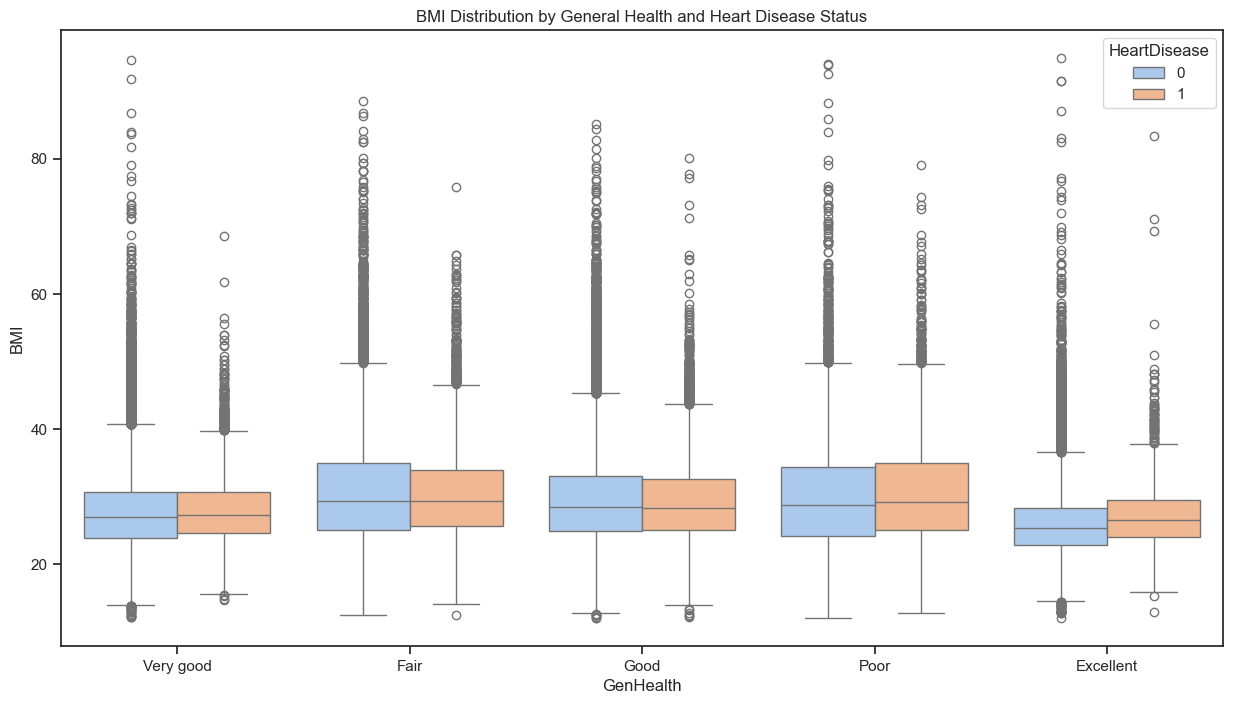

In [183]:
plt.figure(figsize=(15, 8))
sns.boxplot(x="GenHealth", y="BMI", hue="HeartDisease", data=df)
plt.title('BMI Distribution by General Health and Heart Disease Status')
plt.show()

This boxplot illustrates the distribution of sleep time across different diabetic statuses while also showing heart disease status (blue for no heart disease, brown for yes). The distribution is remarkably consistent across all diabetic categories (Yes, No, borderline diabetes, and during pregnancy), with median sleep times clustering around 7-8 hours for all groups. Each category shows similar ranges, with most people sleeping between 5-10 hours, and outliers (shown as dots) extending to both extremes of very short (1-2 hours) and very long (20+ hours) sleep durations. The nearly identical distributions between those with and without heart disease (blue and brown boxes) in each diabetic category supports the very weak correlation (0.01) seen in the correlation matrix between sleep time and heart disease. Additionally, the consistency across diabetic statuses suggests that diabetes doesn't significantly impact sleep duration patterns, regardless of heart disease status.

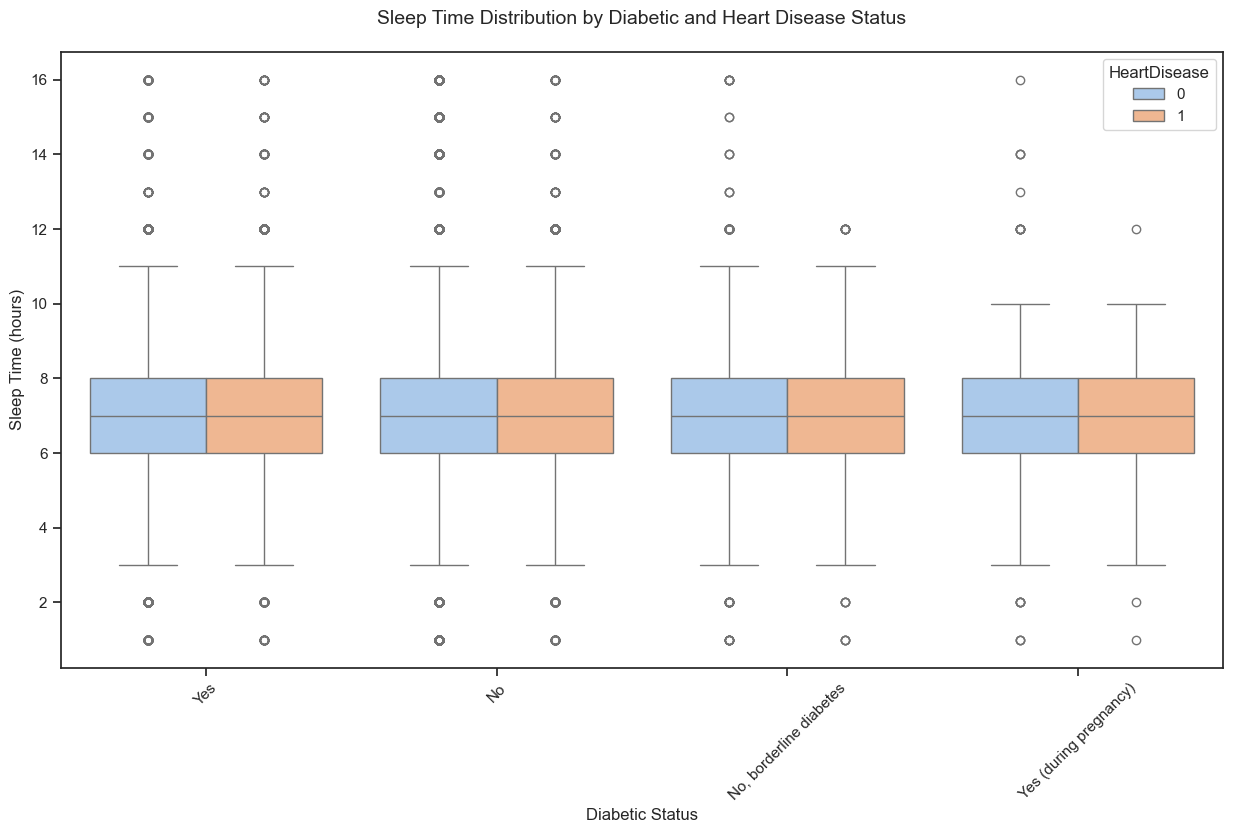

In [185]:
# Set the theme
sns.set_theme(style="ticks", palette="pastel")

# Create the plot
plt.figure(figsize=(15, 8))
sns.boxplot(x="Diabetic", y="SleepTime", hue="HeartDisease", data=df)

# Customize the plot
plt.title('Sleep Time Distribution by Diabetic and Heart Disease Status', fontsize=14, pad=20)
plt.xlabel('Diabetic Status', fontsize=12)
plt.ylabel('Sleep Time (hours)', fontsize=12)

# Rotate x-axis labels if they're too long
plt.xticks(rotation=45)

plt.show()

The violin plot demonstrates the complex relationship between physical health issues, asthma, and heart disease. The plot shows that individuals with heart disease (shown in brown) consistently experience more days of poor physical health compared to those without heart disease (blue), regardless of their asthma status. Among those with heart disease, the distribution is wider and shows a higher concentration of days with physical health problems. When looking at asthma's impact, asthmatic individuals display more symmetrical and concentrated distributions of physical health issues, while non-asthmatics show more spread in their patterns. The combined presence of both conditions appears to have a compounding effect, with individuals having both heart disease and asthma showing the highest concentration of physical health issues, while those with neither condition report the fewest days of poor physical health. These patterns align with the correlation matrix findings, where heart disease showed a stronger correlation with physical health (0.17) compared to asthma's weaker correlation (0.04), indicating that heart disease has a more significant impact on physical health than asthma.

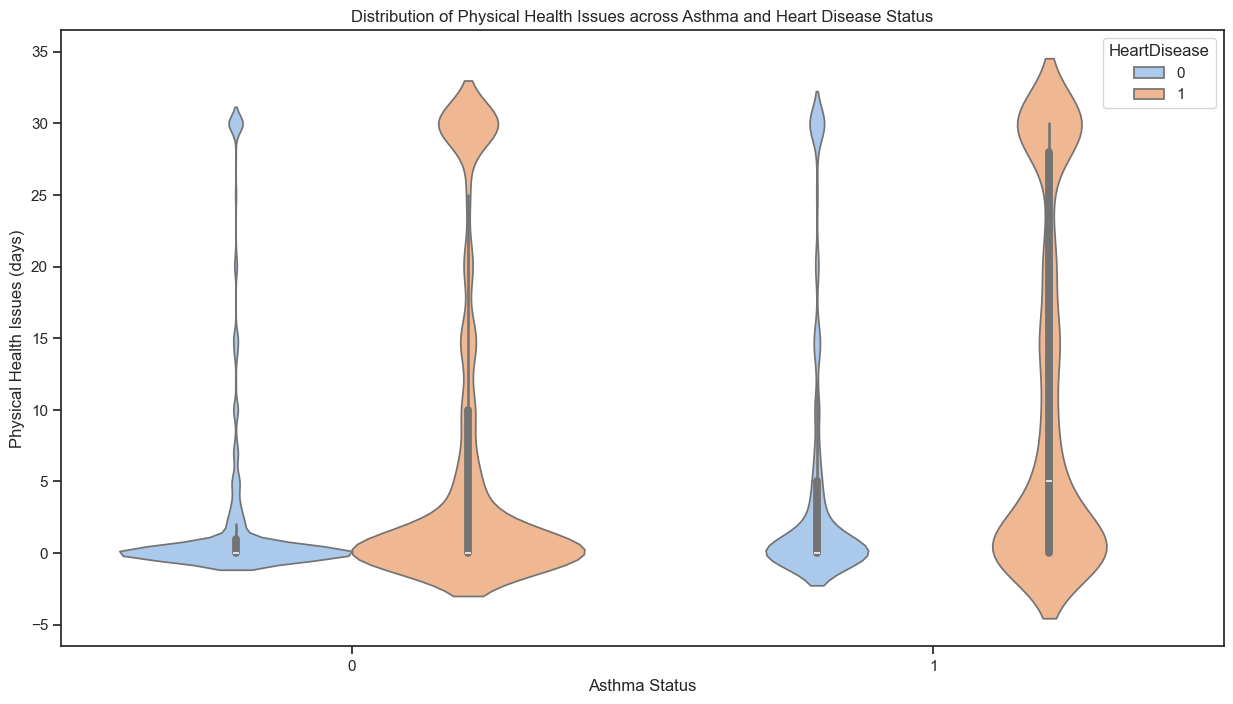

In [187]:
sns.set_theme(style="ticks", palette="pastel")
plt.figure(figsize=(15,8))
sns.violinplot(x="Asthma", y="PhysicalHealth", hue="HeartDisease", data=df)
plt.title('Distribution of Physical Health Issues across Asthma and Heart Disease Status')
plt.xlabel('Asthma Status')
plt.ylabel('Physical Health Issues (days)')
plt.show()

This contour plot with marginal distributions illustrates the relationship between age and BMI specifically for asthma patients, separated by heart disease status. The central plot shows density contours (blue for no heart disease, orange for heart disease) while the top and right margins display the distributions of age and BMI respectively. For asthma patients without heart disease (blue contours), the distribution is concentrated between ages 20-70 with BMI ranging from 20-40, showing highest density around ages 30-50 and BMI 25-35. Those with both asthma and heart disease (orange contours) tend to be older, with distributions shifted towards the 50-80 age range, while maintaining similar BMI ranges, though slightly skewing higher. The marginal distributions clearly demonstrate that among asthma patients, those with heart disease tend to be older, with a subtle trend toward higher BMI values. This aligns with the correlation matrix findings, which showed weak correlations between heart disease and both BMI (0.05) and asthma (0.04), suggesting these relationships exist but aren't strongly predictive.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the dataset
df_age_astma = pd.read_csv('heart_2020_cleaned.csv')

# age mapping (converting categorical age to numeric)
age_mapping = {
    '18-24': 21,
    '25-29': 27,
    '30-34': 32,
    '35-39': 37,
    '40-44': 42,
    '45-49': 47,
    '50-54': 52,
    '55-59': 57,
    '60-64': 62,
    '65-69': 67,
    '70-74': 72,
    '75-79': 77,
    '80 or older': 82
}

# create new column with numeric age
df_age_astma['AgeNumeric'] = df_age_astma['AgeCategory'].map(age_mapping)

# filter data for skin cancer cases
astma = df_age_astma[df_age_astma['Asthma'] == 'Yes']

# create the joint plot with modified parameters
g = sns.jointplot(data=astma,
                  x="AgeNumeric",
                  y="BMI",
                  hue="HeartDisease",
                  kind="kde",
                  height=10)

plt.suptitle('Relationship between Age and BMI for Asthma Patients by Heart Disease Status',
             y=1.02,
             fontsize=12)

# improve axis labels
g.ax_joint.set_xlabel('Age', fontsize=10)
g.ax_joint.set_ylabel('BMI', fontsize=10)

plt.show()

# Required change? change of the columns ? if we choose to not change we need to check the distribution of the race in the data set because in the summary there is a mention of more white people
This violin plot presents a highly specific subset of data, showing age distributions across different racial groups for skin cancer patients who sleep less than 6 hours, further divided by heart disease status (blue for no heart disease, brown for yes). Across all racial groups, there are several consistent patterns: individuals with heart disease (brown) tend to be concentrated in the older age ranges (50-80 years), while those without heart disease (blue) show a wider age distribution starting from younger ages (20-80 years). The distributions are relatively similar across racial groups, though the White population shows the largest sample size as indicated by the width of the violin plot. Asian and American Indian/Alaskan Native groups show slightly more compressed age distributions, possibly due to smaller sample sizes. The plot's focus on individuals with less than 6 hours of sleep is interesting, though the correlation matrix showed sleep time had a negligible correlation (0.01) with heart disease, suggesting that sleep duration alone may not be a strong predictor of heart disease. Similarly, race showed a weak negative correlation (-0.04) with heart disease, indicating that racial differences may not be strongly associated with heart disease risk when controlling for other factors.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the dataset
df = pd.read_csv('heart_2020_cleaned.csv')

# Create age mapping (converting categorical age to numeric)
age_mapping = {
    '18-24': 21,
    '25-29': 27,
    '30-34': 32,
    '35-39': 37,
    '40-44': 42,
    '45-49': 47,
    '50-54': 52,
    '55-59': 57,
    '60-64': 62,
    '65-69': 67,
    '70-74': 72,
    '75-79': 77,
    '80 or older': 82
}

# Create new column with numeric age
df['AgeNumeric'] = df['AgeCategory'].map(age_mapping)

# Filter data for skin cancer cases AND sleep hours < 6
low_sleep = df[df['SleepTime'] < 6]

# Create a figure
plt.figure(figsize=(15, 8))

# Create a violin plot
sns.violinplot(data=low_sleep,
               x="Race",
               y="AgeNumeric",
               hue="HeartDisease",
               split=True)

plt.title('Age Distribution by Race and Heart Disease Status for Skin Cancer Patients\nwith Less Than 6 Hours of Sleep',
         pad=20)
plt.xlabel('Race')
plt.ylabel('Age')
plt.xticks(rotation=45)

plt.show()

This violin plot shows the age distribution across different racial groups, split by heart disease status (blue for no heart disease, brown for yes). Several key patterns emerge: across all racial groups, individuals with heart disease (brown) tend to be concentrated in the older age ranges (50-80 years), while those without heart disease (blue) show a wider age distribution from younger to older ages (20-80 years). The White population displays the largest sample size, as indicated by the width of its violin plot, and shows a more detailed distribution with multiple peaks. Other racial groups (Black, Asian, American Indian/Alaskan Native, Hispanic, and Other) show similar overall patterns but with smoother distributions, possibly due to smaller sample sizes. The correlation matrix supports these visualizations, showing age having a notable positive correlation with heart disease (0.23), while race had a weak negative correlation (-0.04), suggesting that age is a more significant factor in heart disease risk than racial background.

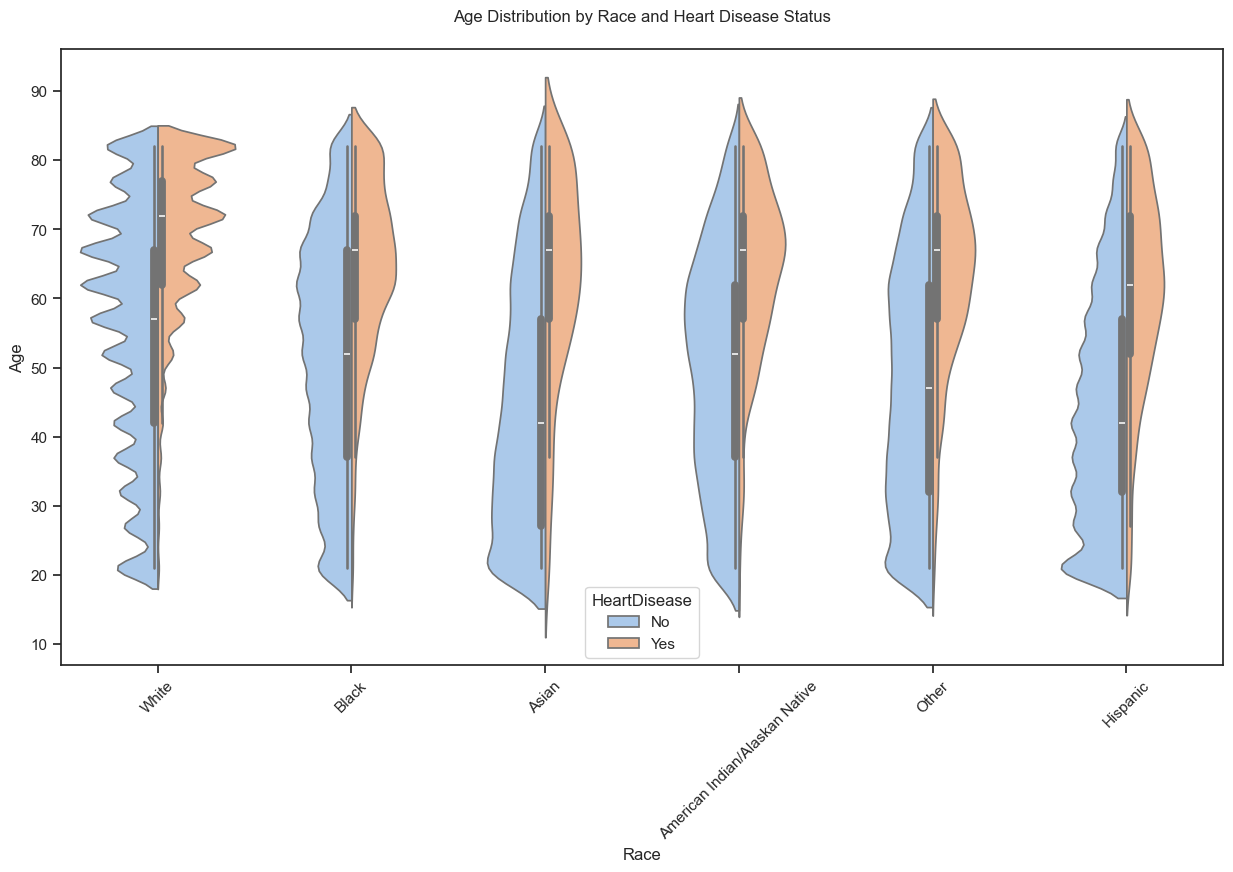

In [188]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# read the data again to avoid changes that affect the next graph
df = pd.read_csv('heart_2020_cleaned.csv')

# Create age mapping (converting categorical age to numeric)
age_mapping = {
    '18-24': 21,
    '25-29': 27,
    '30-34': 32,
    '35-39': 37,
    '40-44': 42,
    '45-49': 47,
    '50-54': 52,
    '55-59': 57,
    '60-64': 62,
    '65-69': 67,
    '70-74': 72,
    '75-79': 77,
    '80 or older': 82
}

# Create new column with numeric age
df['AgeNumeric'] = df['AgeCategory'].map(age_mapping)

# Create a figure
plt.figure(figsize=(15, 8))

# Create a violin plot
sns.violinplot(data=df,
               x="Race",
               y="AgeNumeric",
               hue="HeartDisease",
               split=True)

plt.title('Age Distribution by Race and Heart Disease Status',
         pad=20)
plt.xlabel('Race')
plt.ylabel('Age')
plt.xticks(rotation=45)

plt.show()

This visualization shows a Principal Component Analysis (PCA) of health metrics including BMI, Physical Health, Mental Health, and Sleep Time, with points colored by heart disease status. The data has been standardized before applying PCA to ensure all features are on the same scale.

The scatter plot shows the first two principal components (PC1 and PC2), which together explain about 58% of the total variance in the data (PC1: 34.6%, PC2: 23.9%). The points are distributed in a diagonal pattern, suggesting a correlation between these components. While there is some overlap, there's a subtle separation between individuals with heart disease (lighter blue points) and without heart disease (darker blue points).

The code first selects the numerical columns for PCA, standardizes them using StandardScaler, and then applies PCA with 2 components. The alpha value of 0.5 in the plot allows for better visualization of overlapping points. The relatively low explained variance ratio suggests that these health metrics have complex relationships that can't be fully captured in just two dimensions, though they still provide meaningful insights into how these health variables relate to heart disease status.

The somewhat diffuse pattern of points indicates that while these health metrics do have some predictive power for heart disease, there isn't a clear-cut separation between the two groups, which aligns with the moderate correlations we saw in the correlation matrix for these variables.

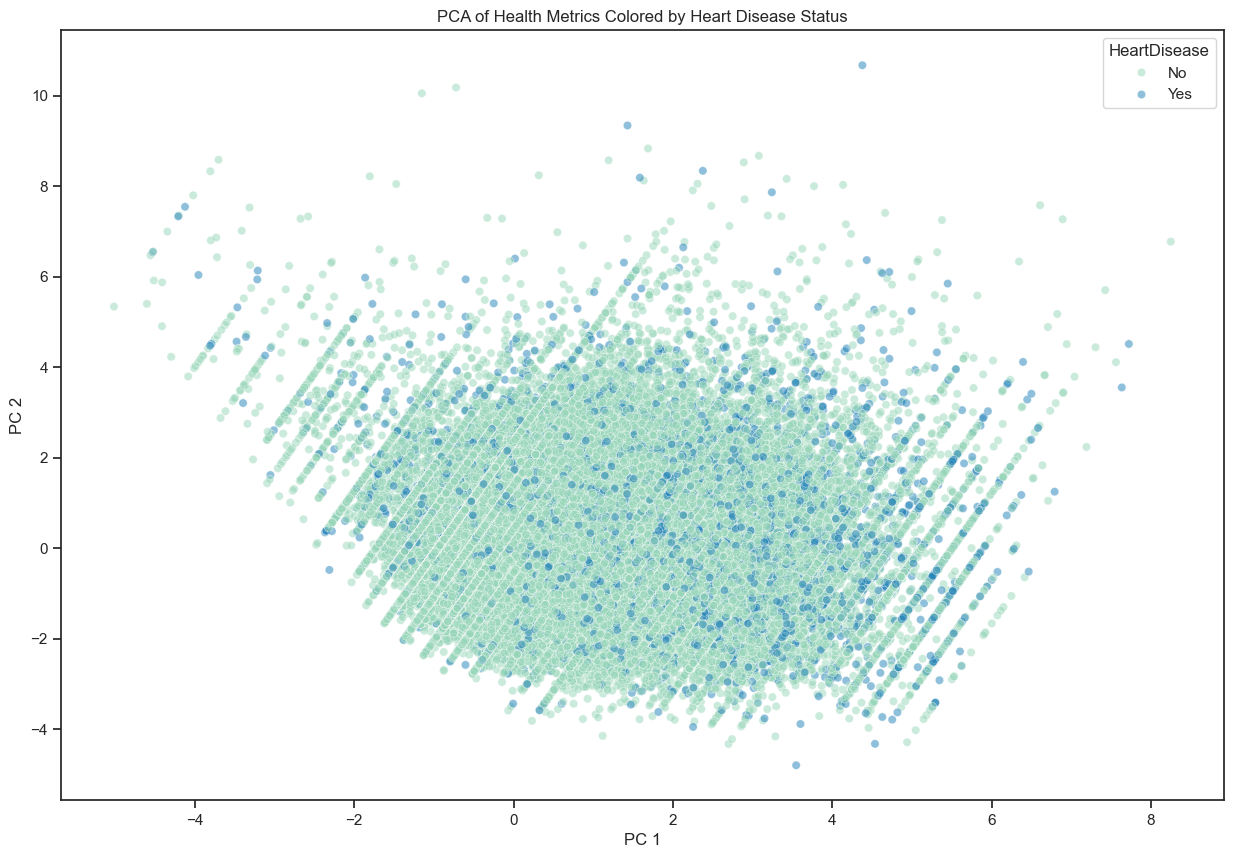


Explained variance ratio:
[0.34578571 0.23979897]


In [190]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# select numerical columns for PCA
numerical_cols = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']
X = df[numerical_cols]

# standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

# create a DataFrame with principal components
principalDf = pd.DataFrame(data=principal_components, columns=['PC 1', 'PC 2'])

# add HeartDisease column for coloring
principalDf['HeartDisease'] = df['HeartDisease']

# create the scatter plot
plt.figure(figsize=(15, 10))
sns.scatterplot(data=principalDf,
                x="PC 1",
                y="PC 2",
                hue="HeartDisease",
                palette="YlGnBu",
                alpha=0.5)

plt.title('PCA of Health Metrics Colored by Heart Disease Status')
plt.show()

# Print explained variance ratio
print("\nExplained variance ratio:")
print(pca.explained_variance_ratio_)

# Need to add barplots of the columns that contains non-numeric values